In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import math
%matplotlib inline


In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [4]:
# gets all column names and returns index object
cols = confirmed_df.keys()

In [5]:
# returns only the dates columns
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

# gets date information from columns in an index object
dates = confirmed.keys()

In [6]:
# gets total current tallies and also creates list of daily statistics
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []
active_cases = []

for i in dates:
    # the .sum() function adds all values in axis, i.e. daily stats
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    active_cases_tot = confirmed_sum - (death_sum + recovered_sum)
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)
    active_cases.append(active_cases_tot)

In [7]:
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
active_cases = np.array(active_cases).reshape(-1, 1)

In [8]:
world_cases = pd.DataFrame(world_cases, index=dates, columns = ['World Cases'])
total_deaths = pd.DataFrame(total_deaths, index=dates, columns = ['Total Deaths'])
total_recovered = pd.DataFrame(total_recovered, index=dates, columns = ['Total Recoveries'])
mortality_rate = pd.DataFrame(mortality_rate, index=dates, columns = ['Cumulative Mortality Rate'])
active_cases = pd.DataFrame(active_cases, index=dates, columns = ['Active Cases'])

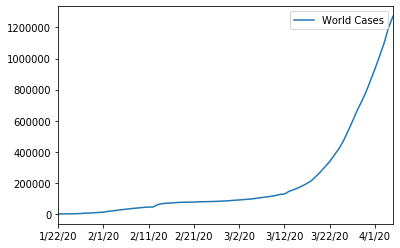

In [9]:
world_cases.plot(kind='line')

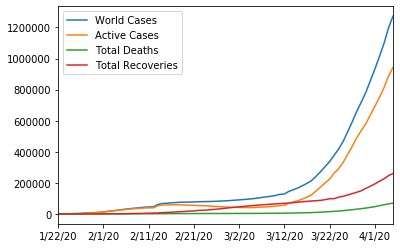

In [10]:
pd.concat([world_cases, active_cases, total_deaths, total_recovered], axis=1).plot()

In [11]:
# new cases per day
new_cases_daily = world_cases
new_cases_daily.rename(columns={'World Cases': 'New Cases'}, inplace=True)
new_cases_daily = new_cases_daily.diff(axis=0)
new_cases_daily.fillna(555, inplace=True)

In [12]:
new_cases_daily['New Cases'] = new_cases_daily['New Cases'].astype(int)

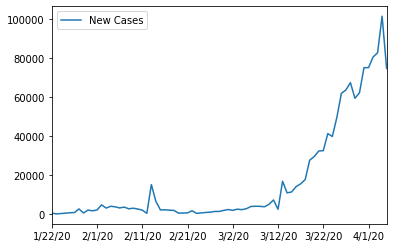

In [13]:
new_cases_daily.plot(kind='line')

In [14]:
new_deaths_daily = total_deaths
new_deaths_daily.rename(columns={'Total Deaths': 'New Deaths'}, inplace=True)
new_deaths_daily = new_deaths_daily.diff(axis=0)
new_deaths_daily.fillna(17, inplace=True)

In [15]:
new_deaths_daily['New Deaths'] = new_deaths_daily['New Deaths'].astype(int)

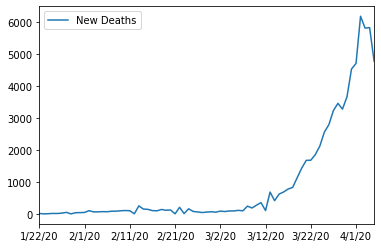

In [16]:
new_deaths_daily.plot(kind='line')

In [17]:
new_recoveries_daily = total_recovered
new_recoveries_daily.rename(columns={'Total Recoveries': 'New Recoveries'}, inplace=True)
new_recoveries_daily = new_recoveries_daily.diff(axis=0)
new_recoveries_daily.fillna(28, inplace=True)

In [18]:
new_recoveries_daily['New Recoveries'] = new_recoveries_daily['New Recoveries'].astype(int)

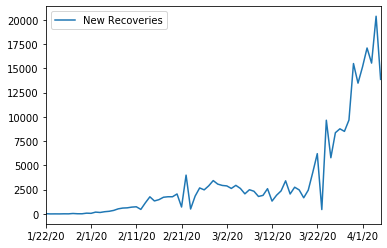

In [19]:
new_recoveries_daily.plot(kind='line')

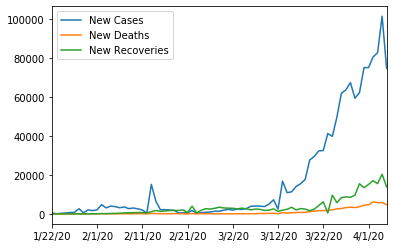

In [20]:
pd.concat([new_cases_daily, new_deaths_daily, new_recoveries_daily], axis=1).plot()

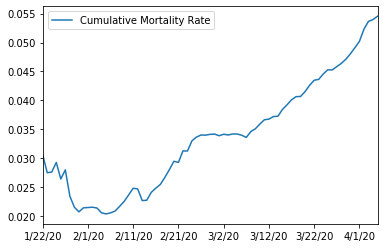

In [21]:
mortality_rate.plot(kind='line')

In [22]:
confirmed_by_country = confirmed_df.drop(['Province/State', 'Lat', 'Long'], axis=1)
deaths_by_country = deaths_df.drop(['Province/State', 'Lat', 'Long'], axis=1)
recoveries_by_country = recoveries_df.drop(['Province/State', 'Lat', 'Long'], axis=1)

In [23]:
# gets list of all countries with cases
countries = confirmed_by_country['Country/Region'].unique()
print(len(countries))

183


In [24]:
confirmed_by_country = confirmed_by_country.groupby(['Country/Region']).sum()
deaths_by_country = deaths_by_country.groupby(['Country/Region']).sum()
recoveries_by_country = recoveries_by_country.groupby(['Country/Region']).sum()

In [25]:
confirmed_by_country

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,18,30,30,31,38,39,47,53,56,61,66,75,85,91,94,113,123,134,141,153,163,174,188,203,212,218,233,237,240,241
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,7,16,16,19,26,30,30,31,35,38,38,39,41,44,47,48,52,59,59,59,84,91,98,109,116,119,134,161,194,217,237
Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


In [26]:
confirmed_by_country = confirmed_by_country.swapaxes('index', 'columns')
deaths_by_country = deaths_by_country.swapaxes('index', 'columns')
recoveries_by_country = recoveries_by_country.swapaxes('index', 'columns')

In [27]:
# renames the index
confirmed_by_country.index.names = ['Dates']

In [28]:
confirmed_by_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Cuba,Cyprus,Czechia,Denmark,Diamond Princess,Djibouti,Dominica,...,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
Dates,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,7,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,4,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,0


In [29]:
italy_cum = pd.concat([confirmed_by_country['Italy'], deaths_by_country['Italy'], recoveries_by_country['Italy']], axis=1)
italy_cum.columns = ['Italian Confirmed Cases', 'Italian Deaths', 'Italian Recoveries']
italy_cum['Italian Morality Rate'] = italy_cum['Italian Deaths'] / italy_cum['Italian Confirmed Cases']
italy_cum.dropna(inplace=True)

# adds new column days_since_detection
days_since_detection = len(italy_cum.index.get_level_values(0))
days_since_detection = np.array([i for i in range(days_since_detection)]).reshape(-1, 1)
italy_cum['Days Since Detection'] = days_since_detection
italy_cum.set_index('Days Since Detection', inplace=True)

In [30]:
usa_cum = pd.concat([confirmed_by_country['US'], deaths_by_country['US'], recoveries_by_country['US']], axis=1)
usa_cum.columns = ['American Confirmed Cases', 'American Deaths', 'American Recoveries']
usa_cum['American Morality Rate'] = usa_cum['American Deaths'] / usa_cum['American Confirmed Cases']
usa_cum.dropna(inplace=True)

# adds new column days_since_detection
days_since_detection = len(usa_cum.index.get_level_values(0))
days_since_detection = np.array([i for i in range(days_since_detection)]).reshape(-1, 1)
usa_cum['Days Since Detection'] = days_since_detection
usa_cum.set_index('Days Since Detection', inplace=True)

In [31]:
china_cum = pd.concat([confirmed_by_country['China'], deaths_by_country['China'], recoveries_by_country['China']], axis=1)
china_cum.columns = ['Chinese Confirmed Cases', 'Chinese Deaths', 'Chinese Recoveries']
china_cum['Chinese Morality Rate'] = china_cum['Chinese Deaths'] / china_cum['Chinese Confirmed Cases']
china_cum.dropna(inplace=True)

# adds new column days_since_detection
days_since_detection = len(china_cum.index.get_level_values(0))
days_since_detection = np.array([i for i in range(days_since_detection)]).reshape(-1, 1)
china_cum['Days Since Detection'] = days_since_detection
china_cum.set_index('Days Since Detection', inplace=True)

In [32]:
sk_cum = pd.concat([confirmed_by_country['Korea, South'], deaths_by_country['Korea, South'], recoveries_by_country['Korea, South']], axis=1)
sk_cum.columns = ['South Korean Confirmed Cases', 'South Korean Deaths', 'South Korean Recoveries']
sk_cum['South Korean Morality Rate'] = sk_cum['South Korean Deaths'] / sk_cum['South Korean Confirmed Cases']
sk_cum.dropna(inplace=True)

# adds new column days_since_detection
days_since_detection = len(sk_cum.index.get_level_values(0))
days_since_detection = np.array([i for i in range(days_since_detection)]).reshape(-1, 1)
sk_cum['Days Since Detection'] = days_since_detection
sk_cum.set_index('Days Since Detection', inplace=True)

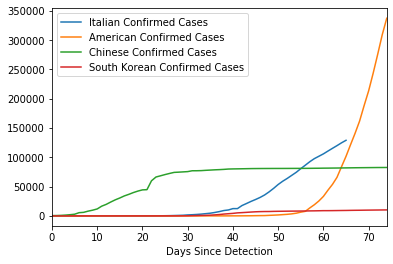

In [33]:
pd.concat([italy_cum['Italian Confirmed Cases'], usa_cum['American Confirmed Cases'], china_cum['Chinese Confirmed Cases'], sk_cum['South Korean Confirmed Cases']], axis=1).plot()

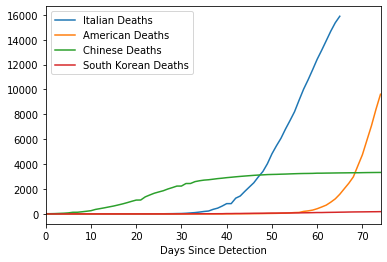

In [34]:
pd.concat([italy_cum['Italian Deaths'], usa_cum['American Deaths'], china_cum['Chinese Deaths'], sk_cum['South Korean Deaths']], axis=1).plot()

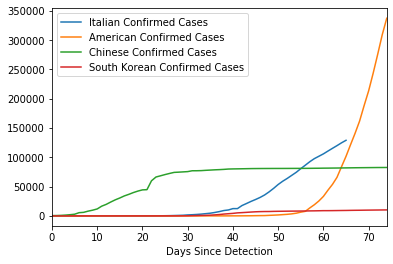

In [35]:
pd.concat([italy_cum['Italian Confirmed Cases'], usa_cum['American Confirmed Cases'], china_cum['Chinese Confirmed Cases'], sk_cum['South Korean Confirmed Cases']], axis=1).plot()

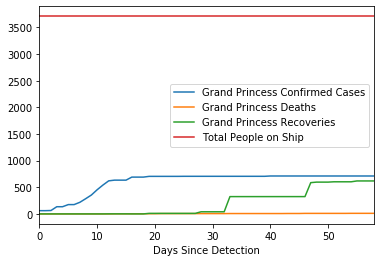

In [36]:
cruise_cum = pd.concat([confirmed_by_country['Diamond Princess'], deaths_by_country['Diamond Princess'], recoveries_by_country['Diamond Princess']], axis=1)
cruise_cum.columns = ['Grand Princess Confirmed Cases', 'Grand Princess Deaths', 'Grand Princess Recoveries']
cruise_cum['Grand Princess Mortality Rate'] = cruise_cum['Grand Princess Deaths'] / cruise_cum['Grand Princess Confirmed Cases']
cruise_cum.dropna(inplace=True)
cruise_cum.drop(['Grand Princess Mortality Rate'], axis=1, inplace=True)

# adds new column days_since_detection
days_since_detection = len(cruise_cum.index.get_level_values(0))
days_since_detection = np.array([i for i in range(days_since_detection)]).reshape(-1, 1)
cruise_cum['Days Since Detection'] = days_since_detection
cruise_cum.set_index('Days Since Detection', inplace=True)

cruise_cum['Total People on Ship'] = 3711

cruise_cum.plot()

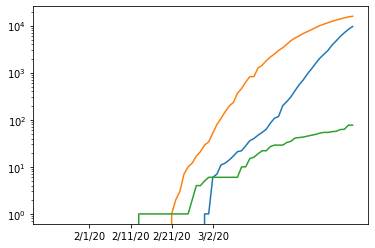

In [37]:
compare = pd.concat([deaths_by_country['US'], deaths_by_country['Italy'], deaths_by_country['Japan']], axis=1)

plt.plot(compare)
plt.yscale('log')
plt.xticks(np.arange(10,50, step=10))
plt.show()

In [38]:
# code allows for importing of http
import io
import requests

url="https://covidtracking.com/api/us/daily.csv"
s=requests.get(url).content
usa_detail = pd.read_csv(io.StringIO(s.decode('utf-8')))
usa_detail.fillna(0, downcast='infer', inplace=True)
usa_detail.drop(['date', 'states', 'negative', 'pending', 'total'], axis=1, inplace=True)
usa_detail.rename(columns={'positive': 'Americans Confirmed', 'posNeg': 'Americans Tested', 'death': 'American Deaths'}, inplace=True)

In [39]:
# reverse ordered so index corresponds with days since mass testing
usa_detail.iloc[:] = usa_detail.iloc[::-1].values
usa_detail.index.names = ['Days Since Beginning Mass Testing']

In [40]:
usa_detail['American Positive Test Rate'] = usa_detail['Americans Confirmed'] / usa_detail['Americans Tested']

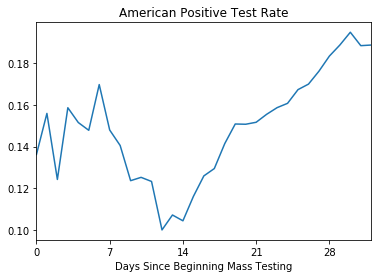

In [66]:
# gets tick marks for X axis
usa_days = range(0, len(usa_detail.index), 7)
usa_detail['American Positive Test Rate'].plot(xticks=usa_days,title='American Positive Test Rate')

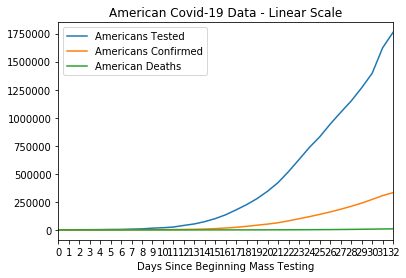

In [42]:
pd.concat([usa_detail['Americans Tested'], usa_detail['Americans Confirmed'], usa_detail['American Deaths']], axis=1).plot(xticks=usa_days, title='American Covid-19 Data - Linear Scale')

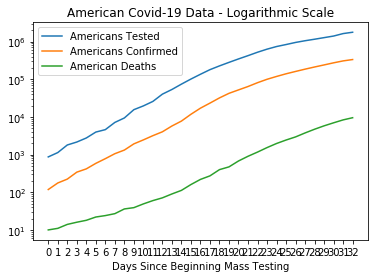

In [43]:
compare = pd.concat([usa_detail['Americans Tested'], usa_detail['Americans Confirmed'], usa_detail['American Deaths']], axis=1)

plt.plot(compare)
plt.yscale('log')
plt.xticks(np.arange(0,len(usa_detail.index), step=1))
plt.xlabel('Days Since Beginning Mass Testing')
plt.legend(['Americans Tested', 'Americans Confirmed', 'American Deaths'])
plt.title('American Covid-19 Data - Logarithmic Scale')
plt.show()

In [44]:
sk_detail_time = pd.read_csv('https://raw.githubusercontent.com/jihoo-kim/Data-Science-for-COVID-19/master/dataset/Time/Time.csv')
sk_detail_time.drop(['date', 'time', 'negative', 'released'], axis=1, inplace=True)
sk_detail_time.index.names = ['Days Since Detection']
sk_detail_time.rename(columns={'test': 'SK Tested', 'confirmed': 'SK Confirmed', 'deceased': 'SK Deaths'}, inplace=True)

In [45]:
sk_detail_time['SK Positive Test Rate'] = sk_detail_time['SK Confirmed'] / sk_detail_time['SK Tested']

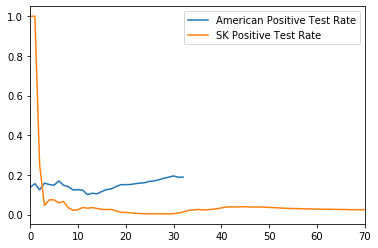

In [47]:
# data from usa_detail began well after detection of the first case whereas data from sk_detail_time began at SK patient zero

pd.concat([usa_detail['American Positive Test Rate'], sk_detail_time['SK Positive Test Rate']], axis=1).plot()

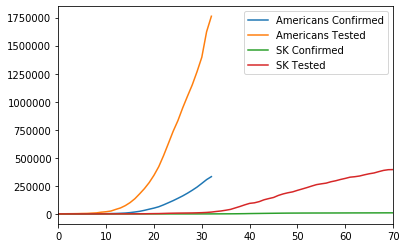

In [48]:
pd.concat([usa_detail['Americans Confirmed'], usa_detail['Americans Tested'], sk_detail_time['SK Confirmed'], sk_detail_time['SK Tested']], axis=1).plot()

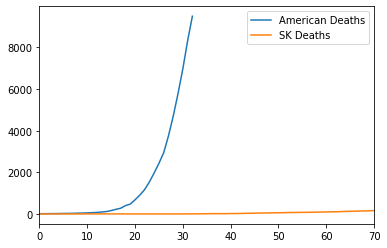

In [49]:
pd.concat([usa_detail['American Deaths'], sk_detail_time['SK Deaths']], axis=1).plot()

In [50]:
# use 2020 freedom index from Freedom House

FH = pd.read_csv('./FreedomHouse2020.csv')
FH

,Country/Territory,Total
0,Abkhazia,40
1,Afghanistan,27
2,Albania,67
3,Algeria,34
4,Andorra,94
...,...,...
205,West Bank,25
206,Western Sahara,4
207,Yemen,11
208,Zambia,54


In [51]:
# checks if today's data is non-zero, i.e. valid
if (deaths_by_country.iloc[-1] == 0).all() == False:
    current_deaths = deaths_by_country.iloc[[-1]]
    print('Most recent day of data loaded')
else:
    print('Prior day of data loaded')
    current_deaths = deaths_by_country.iloc[[-2]]

Most recent day of data loaded


In [52]:
c_cols = current_deaths.keys()
c_cols

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Arab Emirates', 'United Kingdom', 'Uruguay', 'Uzbekistan',
       'Venezuela', 'Vietnam', 'West Bank and Gaza', 'Western Sahara',
       'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=183)

In [53]:
current_deaths = current_deaths.swapaxes('index', 'columns')
current_deaths

,4/5/20
Country/Region,
Afghanistan,7
Albania,20
Algeria,152
Andorra,18
Angola,2
...,...
Vietnam,0
West Bank and Gaza,1
Western Sahara,0


In [54]:
for i in c_cols:
    # checks if country has 100 or more deaths, and then drops if false
    if current_deaths.loc[i].le(99).bool():
        current_deaths.drop(i, inplace=True)

In [55]:
current_deaths.rename(columns={current_deaths.columns[0]: 'Current Deaths'}, inplace=True)

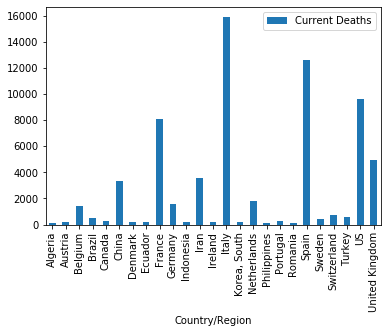

In [56]:
current_deaths.plot(kind='bar', rot=90)

In [57]:
current_deaths

,Current Deaths
Country/Region,
Algeria,152
Austria,204
Belgium,1447
Brazil,486
Canada,259
China,3333
Denmark,179
Ecuador,180
France,8093


In [58]:
# TODO country comparison mortality per 1,000 people
# TODO plot against GDP per capita

demo = pd.read_csv('./demographics_data.csv')
demo.set_index('Country', inplace=True)

In [59]:
demo.loc[['China'], 'Population']

Country
China    1439323776
Name: Population, dtype: int64

In [60]:
current_deaths.index

Index(['Algeria', 'Austria', 'Belgium', 'Brazil', 'Canada', 'China', 'Denmark',
       'Ecuador', 'France', 'Germany', 'Indonesia', 'Iran', 'Ireland', 'Italy',
       'Korea, South', 'Netherlands', 'Philippines', 'Portugal', 'Romania',
       'Spain', 'Sweden', 'Switzerland', 'Turkey', 'US', 'United Kingdom'],
      dtype='object', name='Country/Region')

In [61]:
for country in current_deaths.index:
    print(demo.loc[[country], 'Population'])
    

Country
Algeria    43851044
Name: Population, dtype: int64
Country
Austria    9006398
Name: Population, dtype: int64
Country
Belgium    11589623
Name: Population, dtype: int64
Country
Brazil    212559417
Name: Population, dtype: int64
Country
Canada    37742154
Name: Population, dtype: int64
Country
China    1439323776
Name: Population, dtype: int64
Country
Denmark    5792202
Name: Population, dtype: int64
Country
Ecuador    17643054
Name: Population, dtype: int64
Country
France    65273511
Name: Population, dtype: int64
Country
Germany    83783942
Name: Population, dtype: int64
Country
Indonesia    273523615
Name: Population, dtype: int64
Country
Iran    83992949
Name: Population, dtype: int64
Country
Ireland    4937786
Name: Population, dtype: int64
Country
Italy    60461826
Name: Population, dtype: int64
Country
Korea, South    51269185
Name: Population, dtype: int64
Country
Netherlands    17134872
Name: Population, dtype: int64
Country
Philippines    109581078
Name: Population, dty

In [62]:
# recoveries_by_country.plot.bar(stacked=True)